In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from numba import njit, jit, prange
from img2vec import get_features
from distances import metrics
import pickle
import random
import scipy.spatial.distance as distance

In [2]:
with open("data/f30k_features.pkl", "rb") as f:
    all_files = pickle.load(f)

print("Loaded %i feature vectors" % len(all_files))
excluded_keys = []
print(f"Excluded keys: {excluded_keys}")

for entry in all_files:
    for key in entry["features"]:
        entry["features"][key] = entry["features"][key] / np.linalg.norm(
            entry["features"][key])

Loaded 31784 feature vectors
Excluded keys: []


In [3]:
def apply_metric(metric, query, db):
    distances = []
    for entry in db:
        df = np.concatenate([
            entry["features"][key] for key in entry["features"]
            if key not in excluded_keys
        ])
        distances.append({
            "name": entry["filename"],
            "distance": metric(query, df)
        })
    return distances


Selected image: ./data/f30k/112604461.jpg


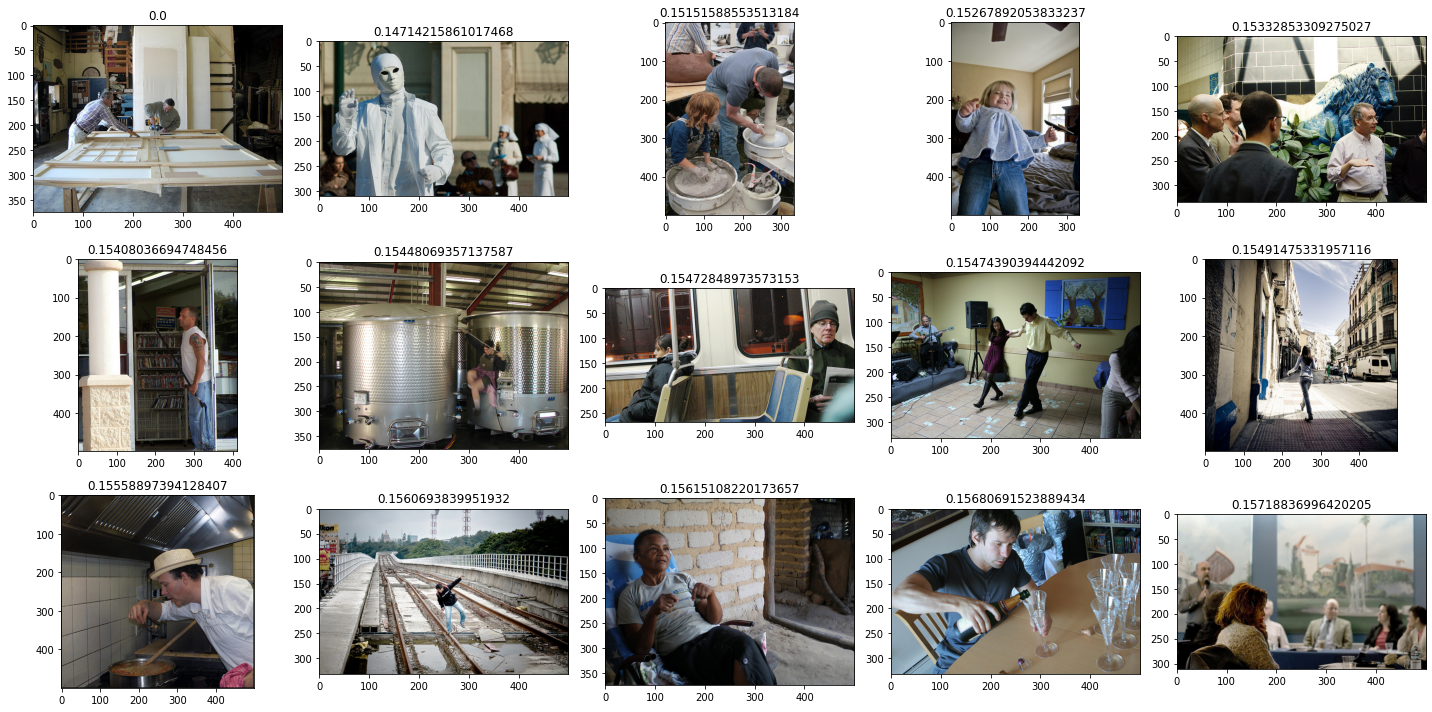

In [11]:
selected_image = "./data/f30k/112604461.jpg"
print("Selected image: %s" % selected_image)
query = cv2.imread(selected_image)
query_f = get_features(query)
query_features = np.concatenate([(query_f[key]) / np.linalg.norm(query_f[key])
                                 for key in query_f
                                 if key not in excluded_keys])

distances = []
for entry in all_files:
  df = np.concatenate([
      entry["features"][key] for key in entry["features"]
      if key not in excluded_keys
  ])
  distances.append({
      'path': entry['filename'],
      'distance': distance.braycurtis(query_features, df)
  })

distances = sorted(distances, key=lambda x: x['distance'])
fig, axs = plt.subplots(3, 5, figsize=(20, 10))

for index, ax in enumerate(axs.flat):
  path = f"./data/f30k/{distances[index]['path']}.jpg"
  ax.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
  ax.set_title(distances[index]['distance'])
  
plt.tight_layout()
plt.show()